# Titanic Machine Learning from Disaster

## Importing Library

In [1]:
import pandas as pd
import string
import numpy as np
from statistics import mode
import matplotlib.pyplot as ply
import seaborn as sb
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Loading Datasets

In [2]:
Data_train=pd.read_csv("E:\\Kaggel compitiion\\Titanic Machine Learning from Disaster\Datasets\\train.csv")
Data_test=pd.read_csv("E:\\Kaggel compitiion\\Titanic Machine Learning from Disaster\Datasets\\test.csv")
df=Data_train.copy()
df1=Data_test.copy()

## Label Encoding

In [3]:
df["Sex"][df["Sex"] == "male"] = 0
df["Sex"][df["Sex"] == "female"] = 1

df1["Sex"][df1["Sex"] == "male"] = 0
df1["Sex"][df1["Sex"] == "female"] = 1


df["Embarked"][df["Embarked"] == "S"] = 0
df["Embarked"][df["Embarked"] == "C"] = 1
df["Embarked"][df["Embarked"] == "Q"] = 2


df1["Embarked"][df1["Embarked"] == "S"] = 0
df1["Embarked"][df1["Embarked"] == "C"] = 1
df1["Embarked"][df1["Embarked"] == "Q"] = 2

C:\Users\sintg\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sintg\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sintg\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\s

## Handeling Missing Values

In [4]:
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [5]:
df1.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [6]:
df["Embarked"] = df["Embarked"].fillna(mode(df["Embarked"]))
df1["Embarked"] = df1["Embarked"].fillna(mode(df1["Embarked"]))

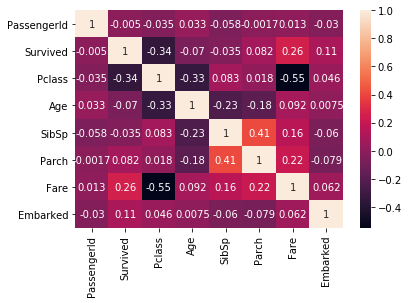

In [7]:
sb.heatmap(df.corr(), annot = True)
# Grouping by Pclass and using a lambda to impute the Age median
df['Age'] = df.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))
# Grouping by Pclass and using a lambda to impute the Age median
df['Age'] = df.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

df1['Age'] = df1.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))
# Grouping by Pclass and using a lambda to impute the Age median
df1['Age'] = df1.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

df['Cabin'] = df['Cabin'].fillna('Missing')
df1['Cabin'] = df1['Cabin'].fillna('Missing')
df1['Fare'] = df1['Fare'].fillna(df1['Fare'].mean())

In [8]:
df.isnull().mean().sort_values(ascending = False)

Embarked       0.0
Cabin          0.0
Fare           0.0
Ticket         0.0
Parch          0.0
SibSp          0.0
Age            0.0
Sex            0.0
Name           0.0
Pclass         0.0
Survived       0.0
PassengerId    0.0
dtype: float64

In [9]:
df1.isnull().mean().sort_values(ascending = False)

Embarked       0.0
Cabin          0.0
Fare           0.0
Ticket         0.0
Parch          0.0
SibSp          0.0
Age            0.0
Sex            0.0
Name           0.0
Pclass         0.0
PassengerId    0.0
dtype: float64

## Handeling Name Features

In [10]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df1['Title'] = df1.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

df['Title'].value_counts(normalize = True) * 100
df1['Title'].value_counts(normalize = True) * 100

df['Title'] = df['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

df1['Title'] = df1['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')


title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5}

df['Title']=df['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Other'],[1,2,3,4,5])
df1['Title']=df1['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Other'],[1,2,3,4,5])

## New feature "familySize"

In [11]:
df['familySize'] = df['SibSp'] + df['Parch'] + 1
df1['familySize'] = df1['SibSp'] + df1['Parch'] + 1

In [12]:
df = df.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis = 1)
df1 = df1.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis = 1)

In [13]:
df[['Sex', 'Embarked']] = df[['Sex', 'Embarked']].apply(pd.to_numeric) 
df1[['Sex', 'Embarked']] = df1[['Sex', 'Embarked']].apply(pd.to_numeric) 

In [14]:
df['Cabin'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
df1['Cabin'] = df1['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'Missing':9}

df['Cabin'] = df['Cabin'].map(cabin_category)
df1['Cabin'] = df1['Cabin'].map(cabin_category)

In [15]:
x=df.iloc[:,2:].values
y=df.iloc[:,1].values
test=df1.iloc[:,1:].values

## Spliting datasets

In [16]:
# Here is out local validation scheme!
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 2)

## Hyperparameter Tunning

In [ ]:
rf=RandomForestClassifier(random_state = 2)
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500,1000],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7,9]    
}

grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
grid.fit(x_train, y_train)

grid.best_params_

## Model Fitting

In [17]:
rf= RandomForestClassifier(random_state=2,criterion='gini',max_depth=9,max_features='log2',n_estimators =300)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

## Prediction

In [18]:
y_pred=rf.predict(x_test)
rf.score(x_test,y_test)

0.8212290502793296

In [19]:
test_pred=rf.predict(test)

## Saving

In [20]:
Data_test=pd.read_csv("E:\\Kaggel compitiion\\Titanic Machine Learning from Disaster\Datasets\\test.csv")
ID=Data_test['PassengerId']
Sur=test_pred
submission = pd.DataFrame({'PassengerId':ID,'Survived':Sur})
submission.to_csv(r"E:\\Kaggel compitiion\\Titanic Machine Learning from Disaster\\Titanic Predictions 3.csv.csv",index=False)